# College Event Feedback Analysis
### Data Science & Analytics – Task 3

**Objective:**  
To analyze student feedback collected after college events using ratings and textual comments and extract actionable insights to improve future events.


### Dataset Description
The dataset used is a simulated Google Forms CSV containing student feedback collected after college events.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud
df = pd.read_csv('student_feedback.csv')







In [14]:
df.head()


,Event_Name,Event_Type,Department,Rating,Feedback,Sentiment
0,Cultural Fest,Cultural,Arts,5,Very informative and engaging,Positive
1,Robotics Bootcamp,Workshop,Mechanical,5,Great learning opportunity,Positive
2,Physics Colloquium,Seminar,Physics,3,Good but could be improved,Positive
3,Biotech Seminar,Seminar,Biotechnology,3,Content was okay,Positive
4,Robotics Bootcamp,Workshop,Mechanical,2,Session was too long,Negative


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Event_Name  100 non-null    object
 1   Event_Type  100 non-null    object
 2   Department  100 non-null    object
 3   Rating      100 non-null    int64 
 4   Feedback    100 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.0+ KB


In [8]:
df.dropna(inplace=True)
df['Rating'] = df['Rating'].astype(int)


Data cleaning was performed by removing missing values and converting ratings into numeric format.


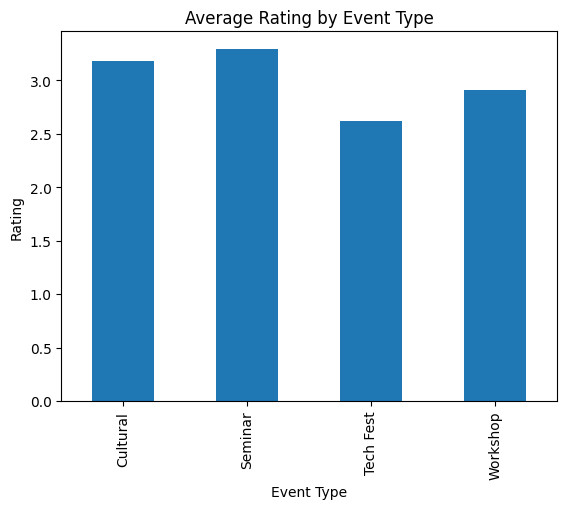

In [9]:
df.groupby('Event_Type')['Rating'].mean().plot(kind='bar')
plt.title('Average Rating by Event Type')
plt.ylabel('Rating')
plt.xlabel('Event Type')
plt.show()


In [10]:
df.groupby('Event_Name')['Rating'].mean().sort_values(ascending=False).head(5)


,Rating
Event_Name,
Physics Colloquium,3.785714
Entrepreneurship Summit,3.357143
Biotech Seminar,3.300000
Cultural Fest,3.181818
AI Workshop,3.000000


In [17]:
def sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Feedback'].apply(sentiment)


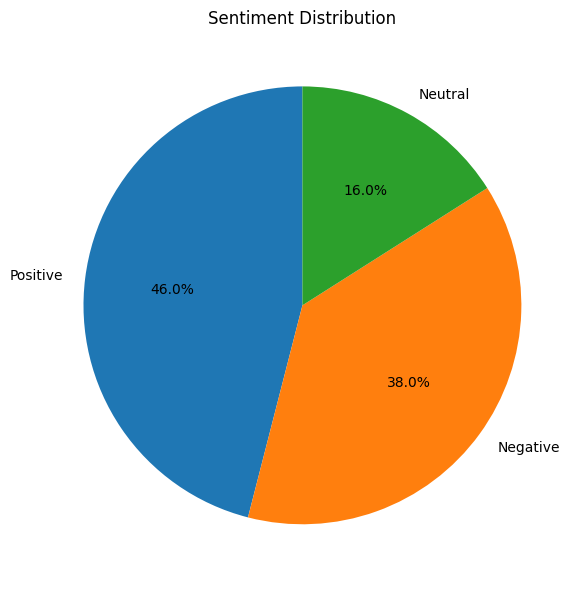

In [18]:
def sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Feedback'].apply(sentiment)

plt.figure(figsize=(6,6))

df['Sentiment'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Sentiment Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

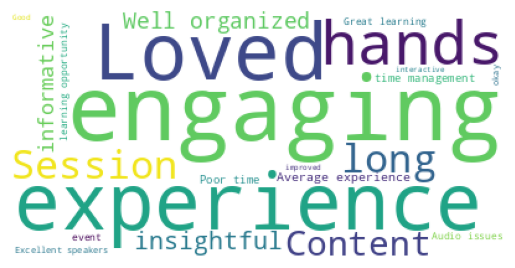

In [13]:
text = " ".join(df['Feedback'])

wc = WordCloud(background_color='white').generate(text)

plt.imshow(wc)
plt.axis('off')
plt.show()


## Key Recommendations for Event Organizers

- Increase interactive workshops as they receive higher satisfaction.
- Improve time management during seminars.
- Enhance audio and venue arrangements.
- Collect structured feedback after every event.
- Use high-performing departments as benchmarks.


### Conclusion

This project demonstrates how student feedback data can be analyzed using data science and NLP techniques. The insights derived from ratings and sentiment analysis can help colleges improve the quality and impact of future events.
